In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [25]:
# Esures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# Import dataframe for COVID deaths 2020-2023 All Ages

In [34]:
covid = pd.read_csv(r'/Users/samantha/Documents/COVID Analysis/02 Data/Prepared Data/COVID CLEAN.csv', index_col = False)

In [35]:
covid.shape

(171220, 6)

In [36]:
covid.head()

,COVID Deaths,Flu Deaths,PNA Deaths,COVID/PNA Deaths,COVID/PNA/Flu Deaths,Total Deaths
0,5,35,282,0,318,4729
1,0,5,5,0,5,71
2,0,0,0,0,0,72
3,0,5,5,0,5,103
4,0,5,10,0,13,199


In [ ]:
# No Need to Drop Unnecessary Columns

In [37]:
covid.isnull().sum()

COVID Deaths            0
Flu Deaths              0
PNA Deaths              0
COVID/PNA Deaths        0
COVID/PNA/Flu Deaths    0
Total Deaths            0
dtype: int64

In [ ]:
# No missing values

In [38]:
dups = covid.duplicated()

In [39]:
dups.shape

(171220,)

In [ ]:
# No duplicates

# 6.5.3 Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [40]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [41]:
score = [kmeans[i].fit(covid).score(covid) for i in range(len(kmeans))] 

score

[-197368251662.6257,
 -90755820479.5525,
 -51789273418.08737,
 -31393422723.871605,
 -23720440455.84123,
 -19728011549.30636,
 -16455132328.538015,
 -14212835241.417372,
 -12205280638.401611]

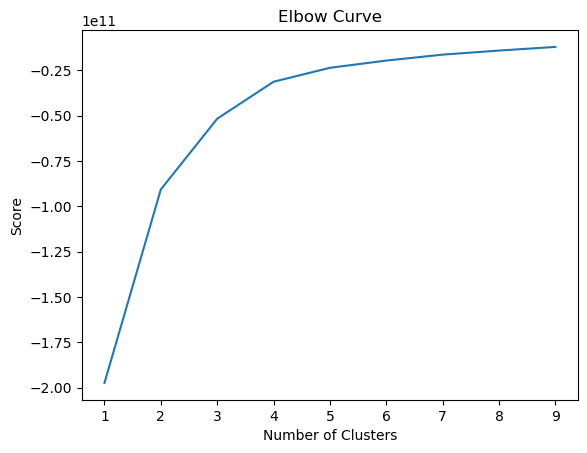

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 6.5.4 Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell.
There is a sharp increase from 1-2 and from 2-3. After 3, the curve increases very gradually, which indicates 3-4 is the breaking point/elbow. Therefore, the number of clusters I will use will be 3.

# 6.5.5 Run the k-means algorithm.

In [43]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [44]:
# Fit the k-means object to the data.

kmeans.fit(covid)

KMeans(n_clusters=3)

# 6.5.6 Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [45]:
covid['clusters'] = kmeans.fit_predict(covid)

In [46]:
covid.head()

,COVID Deaths,Flu Deaths,PNA Deaths,COVID/PNA Deaths,COVID/PNA/Flu Deaths,Total Deaths,clusters
0,5,35,282,0,318,4729,1
1,0,5,5,0,5,71,0
2,0,0,0,0,0,72,0
3,0,5,5,0,5,103,0
4,0,5,10,0,13,199,0


In [47]:
covid['clusters'].value_counts()

0    167595
1      3447
2       178
Name: clusters, dtype: int64

In [49]:
# Plot the clusters for the "COVID Deaths" and "PNA Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=covid['PNA Deaths'], y=covid['C19 Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('PNA Deaths') # Label x-axis.
plt.ylabel('COVID Deaths') # Label y-axis.
plt.show()

KeyError: 'C19 Deaths'

<Figure size 1200x800 with 0 Axes>

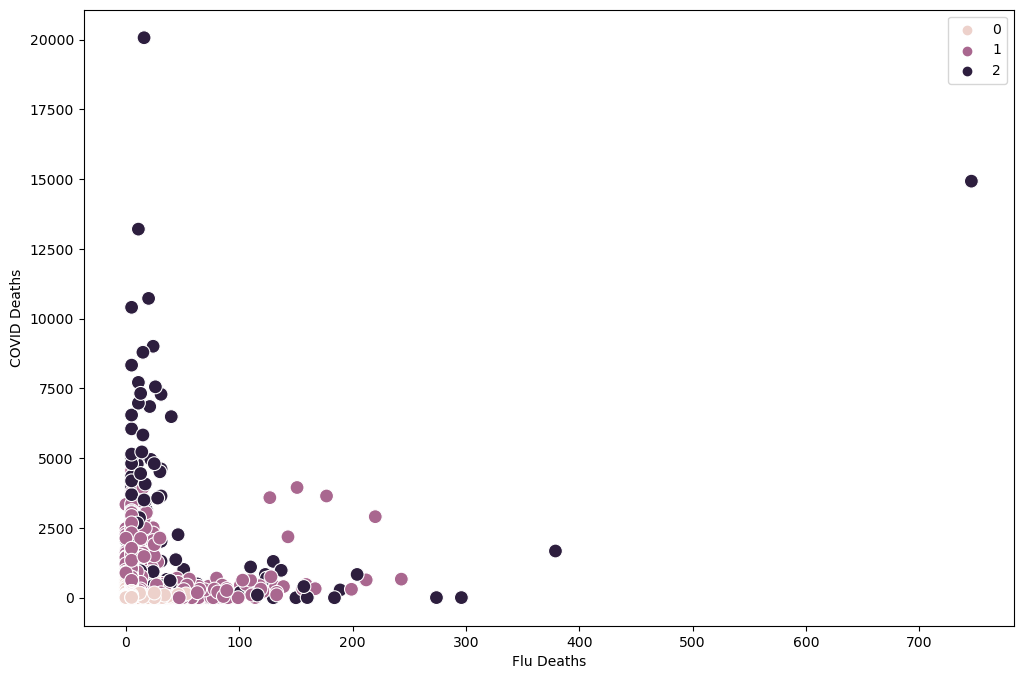

In [18]:
# Plot the clusters for the "COVID Deaths" and "Flu Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=covid['deaths_flu'], y=covid['deaths_c19'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Flu Deaths') # Label x-axis.
plt.ylabel('COVID Deaths') # Label y-axis.
plt.show()

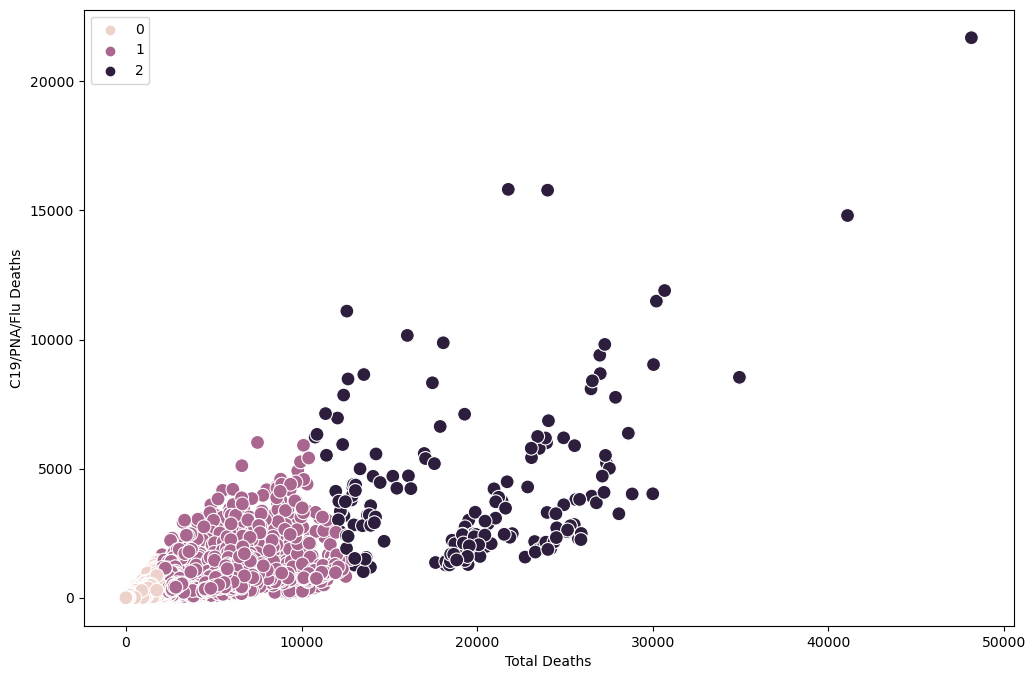

In [50]:
# Plot the clusters for the "C19, PNA or Flu Deaths" and "Total Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=covid['Total Deaths'], y=covid['COVID/PNA/Flu Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total Deaths') # Label x-axis.
plt.ylabel('C19/PNA/Flu Deaths') # Label y-axis.
plt.show()

# 6.5.8 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

### It's hard to fully understand the meaning of the clusters since the variables are fairly similar (deaths from different diseases). The 3 clusters are at least somewaht visible in all 3 visualiztions, but it is unclear as to what they mean. Perhaps the dark pink is younger age groups, light pink is middle aged and dark purple is elderly.


##### COVID vs PNA: The general trend of the data points indicates a fairly positive relationship between the 2 variables. #####COVID vs Flu: There does not seem to be any trend, which is inconsistent with my original hypothesis. C19/PNA/Flu Deaths vs Total Deaths: The general trend of the data points indicates a fairly positive relationship between the 2 variables.

# 6.5.9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [51]:
covid.loc[covid['clusters'] == 2, 'cluster'] = 'dark purple'
covid.loc[covid['clusters'] == 1, 'cluster'] = 'purple'
covid.loc[covid['clusters'] == 0, 'cluster'] = 'pink'

In [53]:
covid.groupby('cluster').agg({'PNA Deaths':['mean', 'median'], 
                         'Flu Deaths':['mean', 'median'], 
                         'COVID/PNA/Flu Deaths':['mean', 'median'],
                         'Total Deaths':['mean','median'],
                          'COVID Deaths':['mean', 'median']})

PNA Deaths         Flu Deaths        COVID/PNA/Flu Deaths  \
                    mean  median       mean median                 mean   
cluster                                                                   
dark purple  2735.668539  2043.0  33.853933   10.5          4104.247191   
pink           13.754659     0.0   0.560989    0.0            20.904830   
purple        505.917610   379.0   9.916449    5.0           768.527995   

                     Total Deaths          COVID Deaths          
             median          mean   median         mean  median  
cluster                                                          
dark purple  3145.5  19923.853933  19410.5  3093.112360  2239.5  
pink            5.0    152.546818     20.0    13.414601     0.0  
purple        542.0   4586.078329   3844.0   528.541340   278.0

# 6.5.10: Propose what these results could be useful for in future steps of an analytics pipeline.
These results indicate that further analysis of COVID 19 vs Flu is warranted. Though age wasn't included in the above analysis, further analysis of age is needed to determine if age has an impact on COVID 19 deaths.

In [54]:
covid.to_csv(r'/Users/samantha/Documents/COVID Analysis/02 Data/Prepared Data/COVID CLEAN.csv')